In [1]:
# Imports
import torch
from transformers import BartForSequenceClassification, BartTokenizer, Trainer, TrainingArguments, BartConfig
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the configuration of the pre-trained model
config = BartConfig.from_pretrained('facebook/bart-large-mnli')
config.num_labels = 9

# Load data
def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    try:
        item['labels'] = torch.tensor(labels.index(self.labels[idx]))
    except ValueError:
        print(f"Warning: Label {self.labels[idx]} not found in labels list!")
        item['labels'] = torch.tensor(-1)  # or some default value
    return item

df = pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/train.csv')
data = df[1:6]
labels = ["1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5", "5.0"]

# Prepare data for each metric
def prepare_data_for_metric(metric):
    texts = data['full_text'].tolist()
    metric_scores = data[metric].astype(str).tolist()
    return texts, metric_scores

# Training function
def train_model_for_metric(metric):
    # Load tokenizer and model
    tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-mnli')
    model = BartForSequenceClassification(config)
    
    # Prepare data
    texts, metric_scores = prepare_data_for_metric(metric)
    
    # Tokenize data
    train_texts, val_texts, train_labels, val_labels = train_test_split(texts, metric_scores, test_size=0.1)
    train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
    val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)
    
    # Create a Torch Dataset
    class EssayDataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(labels.index(self.labels[idx]))
            return item

        def __len__(self):
            return len(self.labels)

    train_dataset = EssayDataset(train_encodings, train_labels)
    val_dataset = EssayDataset(val_encodings, val_labels)
    
    # Define training arguments and initialize Trainer
    training_args = TrainingArguments(
        per_device_train_batch_size=8,
        num_train_epochs=3,
        evaluation_strategy="epoch",
        logging_dir='./logs',
        logging_steps=10,
        do_train=True,
        no_cuda=False,
        load_best_model_at_end=True,
        save_strategy="epoch",
        report_to="tensorboard", # type: ignore
        output_dir=f'./essay-output/results_{metric}'
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
    )
    
    # Train the model
    trainer.train()

    # Save the model
    model.save_pretrained(f'./essay-output/bart_{metric}')
    tokenizer.save_pretrained(f'./essay-output/bart_{metric}')
    
    return model

# Train a model for each metric
metrics = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
models = {}


In [2]:
models['cohesion'] = train_model_for_metric('cohesion')

c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 1.7970407009124756, 'eval_runtime': 0.3362, 'eval_samples_per_second': 2.974, 'eval_steps_per_second': 2.974, 'epoch': 1.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 1.0328681468963623, 'eval_runtime': 0.7073, 'eval_samples_per_second': 1.414, 'eval_steps_per_second': 1.414, 'epoch': 2.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 1.000910997390747, 'eval_runtime': 0.6986, 'eval_samples_per_second': 1.431, 'eval_steps_per_second': 1.431, 'epoch': 3.0}
{'train_runtime': 284.818, 'train_samples_per_second': 0.042, 'train_steps_per_second': 0.011, 'train_loss': 1.6387874285380046, 'epoch': 3.0}


In [3]:
models['syntax'] = train_model_for_metric('syntax')

c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 4.576262474060059, 'eval_runtime': 2.4512, 'eval_samples_per_second': 0.408, 'eval_steps_per_second': 0.408, 'epoch': 1.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 4.794909477233887, 'eval_runtime': 3.6476, 'eval_samples_per_second': 0.274, 'eval_steps_per_second': 0.274, 'epoch': 2.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 4.635828971862793, 'eval_runtime': 4.0797, 'eval_samples_per_second': 0.245, 'eval_steps_per_second': 0.245, 'epoch': 3.0}
{'train_runtime': 400.8259, 'train_samples_per_second': 0.03, 'train_steps_per_second': 0.007, 'train_loss': 1.4741125106811523, 'epoch': 3.0}


In [4]:
models['vocabulary'] = train_model_for_metric('vocabulary')

c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 0.4671934247016907, 'eval_runtime': 3.4712, 'eval_samples_per_second': 0.288, 'eval_steps_per_second': 0.288, 'epoch': 1.0}


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacty of 6.00 GiB of which 0 bytes is free. Of the allocated memory 12.40 GiB is allocated by PyTorch, and 264.28 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
models['phraseology'] = train_model_for_metric('phraseology')

In [ ]:
models['grammar'] = train_model_for_metric('grammar')

In [ ]:
models['conventions'] = train_model_for_metric('conventions')

In [1]:
from transformers import pipeline

classifier = pipeline(
    "zero-shot-classification", 
    model="facebook/bart-large-mnli")
classifier(
    "This is a test for a course about Huggingface transformer libraries",
    candidate_labels = ["education", "politics", "business"],
)

{'sequence': 'This is a test for a course about Huggingface transformer libraries',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.9200394749641418, 0.06149790808558464, 0.018462616950273514]}

In [2]:
import pandas as pd
essays_train = pd.DataFrame(pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/train.csv'))
essays = essays_train['full_text']
essays_for_testing = essays[1:6]
labels = 'cohesion','syntax','vocabulary','phraseology','grammar','conventions'

In [3]:
cohesion_list = pd.DataFrame(essays_train['cohesion'])
cohesion_list.value_counts()

cohesion
3.0         1096
3.5          988
2.5          790
4.0          534
2.0          315
4.5          125
1.5           27
5.0           26
1.0           10
dtype: int64

In [4]:
essays_score_real = pd.DataFrame(essays_train.iloc[1:6 , 2:8])
essays_score_real

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
1,2.5,2.5,3.0,2.0,2.0,2.5
2,3.0,3.5,3.0,3.0,3.0,2.5
3,4.5,4.5,4.5,4.5,4.0,5.0
4,2.5,3.0,3.0,3.0,2.5,2.5
5,3.5,4.0,4.0,3.5,3.5,4.0


In [5]:
essays_for_testing.head()

1    When a problem is a change you have to let it ...
2    Dear, Principal\n\nIf u change the school poli...
3    The best time in life is when you become yours...
4    Small act of kindness can impact in other peop...
5    Dear Principal,\r\n\r\nOur school should have ...
Name: full_text, dtype: object

In [6]:
from transformers import pipeline
classifier = pipeline(
    "zero-shot-classification", 
    model="facebook/bart-large-mnli")

result1 = []
result1 = classifier(
    "I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. Taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home. The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and you'll either not like it or you look and see a stain. Then you'll have to change. With the online classes you can wear anything and stay home and you wont need to stress about what to wear. Most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. When u have online classes u wont need to miss lessons cause you can get everything set up and go take a shower and when u get out your ready to go. When your home your comfortable and you pay attention. It gives then an advantage to be smarter and even pass there classmates on class work. Public schools are difficult even if you try. some teacher dont know how to teach it in then way that students understand it. That causes students to fail and they may repeat the class.              ",
    candidate_labels = labels,
)

output1 = pd.DataFrame(result1) # type: ignore
output1['scores'] = round(((output1['scores'] * 3.0) + 3.0) * 10.0)
output1['scores'] = output1['scores'] / 10.0
output1['scores'] = round(output1['scores'] * 2) / 2 # type: ignore

print(output1)

                                            sequence       labels  scores
0  I think that students would benefit from learn...     cohesion     4.0
1  I think that students would benefit from learn...  conventions     3.5
2  I think that students would benefit from learn...  phraseology     3.5
3  I think that students would benefit from learn...   vocabulary     3.5
4  I think that students would benefit from learn...      grammar     3.5
5  I think that students would benefit from learn...       syntax     3.5


In [7]:
from transformers import pipeline
classifier = pipeline(
    "zero-shot-classification", 
    model="facebook/bart-large-mnli")

result_set = []
for essay in essays_for_testing:
    result = classifier(
        essay,
        candidate_labels = labels,
    )
    result_set.append(result['scores']) # type: ignore

In [8]:
import numpy as np
output = pd.DataFrame(result_set, columns = labels)
output = round(((output * 3.0) + 3.0) * 10.0)
output = output / 10.0 # type: ignore
output = round(output * 2) / 2 # type: ignore

In [9]:
output.to_csv("essays_output.csv",index=False)

In [10]:
essays_score_pred = pd.DataFrame(pd.read_csv('/Users/aryan/Actual-Coding/CDAC/essays_output.csv'))
essays_score_pred

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,4.0,3.5,3.5,3.5,3.5,3.5
1,4.5,3.5,3.5,3.5,3.0,3.0
2,3.5,3.5,3.5,3.5,3.5,3.5
3,4.0,3.5,3.5,3.5,3.0,3.0
4,4.0,3.5,3.5,3.5,3.5,3.5


In [11]:
essays_score_real.astype('int').dtypes
essays_score_pred.astype('int').dtypes

cohesion       int32
syntax         int32
vocabulary     int32
phraseology    int32
grammar        int32
conventions    int32
dtype: object

In [12]:
from sklearn.metrics import r2_score
r_squared = r2_score(essays_score_real, essays_score_pred)
print("R-squared:\n", r_squared)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(essays_score_real, essays_score_pred)
print("\nMean Absolute Error:\n", mae)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(essays_score_real, essays_score_pred)
print("\nMean Squared Error:\n", mse)

import numpy as np
rmse = np.sqrt(mse)
print("\nRoot Mean Squared Error:\n", rmse)

from sklearn.metrics import median_absolute_error
medae = median_absolute_error(essays_score_real, essays_score_pred)
print("\nMedian Absolute Error:\n", medae)

import numpy as np
mape = np.mean(np.abs((essays_score_real - essays_score_pred) / essays_score_real)) * 100
print("\nMean Absolute Percentage Error:\n", mape)

R-squared:
 -0.30803724577309494

Mean Absolute Error:
 0.7333333333333333

Mean Squared Error:
 0.7666666666666666

Root Mean Squared Error:
 0.8755950357709131

Median Absolute Error:
 0.6666666666666666

Mean Absolute Percentage Error:
 cohesion       41.944444
syntax         19.722222
vocabulary     18.055556
phraseology    32.638889
grammar        32.916667
conventions    35.000000
dtype: float64


c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


C:\Users\aryan\AppData\Local\Temp\ipykernel_11816\4001257315.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(essays_train[col], fit=stats.norm)
C:\Users\aryan\AppData\Local\Temp\ipykernel_11816\4001257315.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(essays_train[col], fit=stats.norm

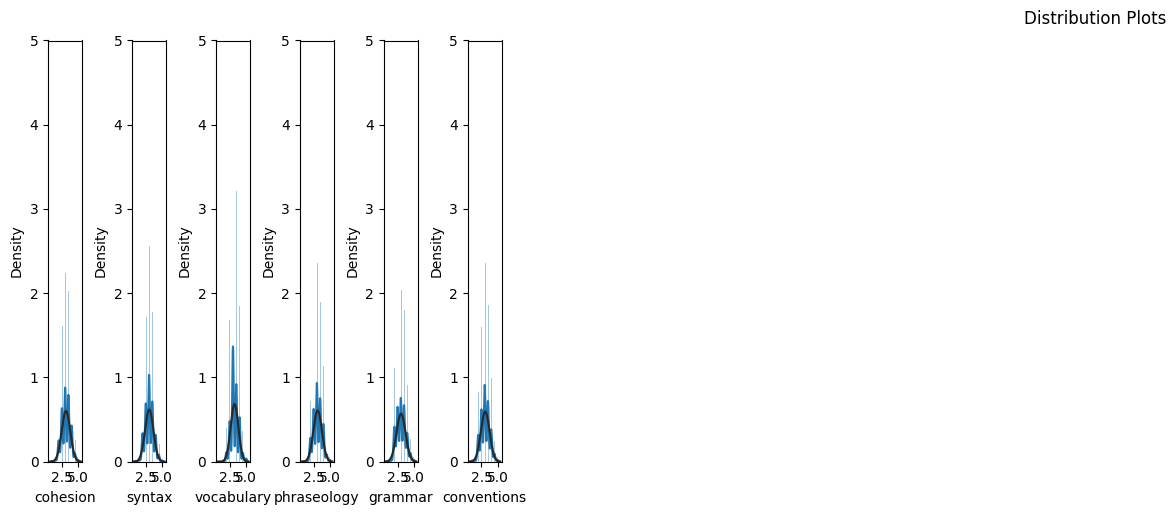

In [13]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize = (22,5))
for i, col in enumerate(essays_train.select_dtypes(['int32','float']).columns): 
    ax = plt.subplot(1, 26, i+1)
    if essays_train[col].dtype == 'int32': 
        sns.distplot(essays_train[col], fit=stats.norm, color = 'red')        
    else: 
        sns.distplot(essays_train[col], fit=stats.norm)        
    ax.set_ylim((0.0, 5.0))
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Distribution Plots', y=1.02)
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_11816\334860329.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(essays_score_pred[col], fit=stats.norm)
C:\Users\aryan\AppData\Local\Temp\ipykernel_11816\334860329.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(essays_score_pred[col], fit=st

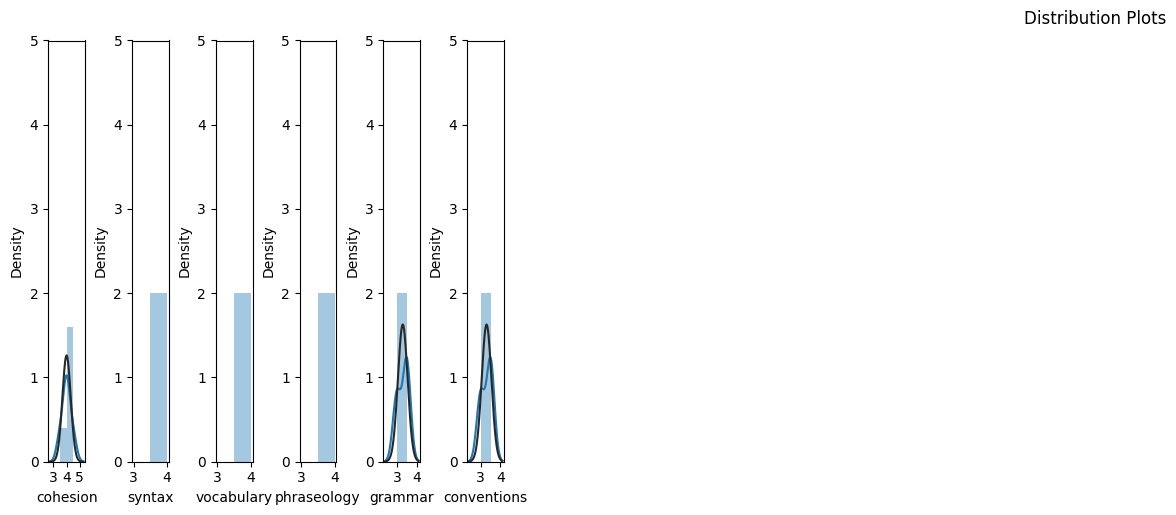

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize = (22,5))
for i, col in enumerate(essays_score_pred.select_dtypes(['int32','float']).columns): 
    ax = plt.subplot(1, 26, i+1)
    if essays_score_pred[col].dtype == 'int32': 
        sns.distplot(essays_score_pred[col], fit=stats.norm, color = 'blue')        
    else: 
        sns.distplot(essays_score_pred[col], fit=stats.norm)        
    ax.set_ylim((0.0, 5.0))
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Distribution Plots', y=1.02)
plt.show()

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import evaluate

# Prepare and tokenize dataset
essays_train = pd.DataFrame(pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/train.csv'))
essays = essays_train['full_text']
x_train = essays[1:10]
cohesions = essays_train['cohesion']
y_train = cohesions[1:10]

essays_test = pd.DataFrame(pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/train.csv'))
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")

def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function)

train_dataset, eval_dataset = 

# Setup evaluation 
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Load pretrained model and evaluate model after each epoch
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=6)
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, AdamW
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import load_metric
import torch

optimizer = AdamW(model.parameters(), lr=training_args.learning_rate)

# Prepare and tokenize dataset
essays = pd.DataFrame(pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/train.csv'))
#essays_train = pd.DataFrame(pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/train.csv'))
#essays = essays_train['full_text']
dataset = essays[1:20]

# Split the dataset into train and test
train_texts, test_texts = train_test_split(dataset, test_size=0.2, random_state=42)

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-mnli")

def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True)

# Tokenize the datasets
labels_train = train_texts['full_test'].tolist()  # Replace 'label_column_name' with the actual column name of the labels
labels_test = test_texts['full_text'].tolist()

tokenized_train = tokenize_function(train_texts['full_text'].tolist())
tokenized_test = tokenize_function(test_texts['full_text'].tolist())

train_dataset = [{'input_ids': input_id, 'attention_mask': attention_mask, 'labels': label} for input_id, attention_mask, label in zip(tokenized_train["input_ids"], tokenized_train["attention_mask"], labels_train)]
test_dataset = [{'input_ids': input_id, 'attention_mask': attention_mask, 'labels': label} for input_id, attention_mask, label in zip(tokenized_test["input_ids"], tokenized_test["attention_mask"], labels_test)]


# Create datasets
train_dataset = tokenized_train["input_ids"], tokenized_train["attention_mask"]
test_dataset = tokenized_test["input_ids"], tokenized_test["attention_mask"]

# Setup evaluation 
metric = load_metric("accuracy")

def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

# Load pretrained model
model = AutoModelForSequenceClassification.from_pretrained("facebook/bart-large-mnli", num_labels=6, ignore_mismatched_sizes=True)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

training_args = TrainingArguments(
    output_dir="./test_trainer",
    evaluation_strategy="steps",
    per_device_train_batch_size=8,  # Adjust batch size as needed
    per_device_eval_batch_size=8,   # Adjust batch size as needed
    logging_dir="./logs",
    save_steps=10,
    save_total_limit=5,
    num_train_epochs=3,
    overwrite_output_dir=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset, # type: ignore
    eval_dataset=test_dataset, # type: ignore
    compute_metrics=compute_metrics,
)

# Define your custom optimizer (e.g., torch.optim.AdamW)
optimizer = torch.optim.AdamW(model.parameters(), lr=training_args.learning_rate)

# Training loop with custom optimizer
for epoch in range(training_args.num_train_epochs): # type: ignore
    trainer.train()
    trainer.evaluate()

c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large-mnli and are newly initialized because the shapes did not match:
- classification_head.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([6]) in the model instantiated
- classification_head.out_proj.weight: found shape torch.Size([3, 1024]) in the checkpoint and torch.Size([6, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\optimizati

  0%|          | 0/3 [00:00<?, ?it/s]

TypeError: vars() argument must have __dict__ attribute

In [ ]:
import tensorflow as tf
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset

# Load your custom dataset along with label weights.
essays_train = pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/train.csv')
essays_test = pd.read_csv('/Users/aryan/Actual-Coding/CDAC/feedback-prize-english-language-learning/test.csv')

# Tokenize the text data.
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-mnli")
encoded_inputs = tokenizer(
    pd.Series(essays_train['full_text']).tolist(),
    padding=True,
    truncation=True,
    return_tensors="pt",  # Return PyTorch tensors
    max_length=32,  # Set your desired maximum sequence length
)

# Create PyTorch datasets and data loaders.
train_input_ids = tf.constant(encoded_inputs["input_ids"])
train_attention_masks = tf.constant(encoded_inputs["attention_mask"])
train_labels = tf.constant(['cohesion','syntax','vocabulary','phraseology','grammar','conventions'])
label_weights = tf.constant(essays_train['cohesion'], essays_train['syntax'], essays_train['vocabulary'], essays_train['phraseology'], essays_train['grammar'], essays_train['conventions']) # type: ignore
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels, label_weights)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Load and configure the model.
model = AutoModelForSequenceClassification.from_pretrained("facebook/bart-large-mnli")
model.config.num_labels = 4  # Set the number of labels for your task.

# Define a custom loss function.
loss_fn = torch.nn.CrossEntropyLoss(weight=label_weights)

# Training loop.
for epoch in range(10):
    for batch in train_loader:
        input_ids, attention_mask, labels, weights = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = loss_fn(outputs.logits, labels)
        # Backpropagation and model weight updates here.

# Validation and testing code here.
